# Results Visualization (Grids)

This notebook is the **analysis / visualization layer**:
- reads `results.jsonl` produced by the runner
- provides flexible grouping and renders grids for comparison


In [1]:
import viz_grids as vg

In [2]:
# -------------------------------------------------
# Robust pathlib paths (relative to notebook file)
# -------------------------------------------------
from pathlib import Path

# Current working directory (where notebook runs)
HERE = Path.cwd()

# Parent directory
EXPERIMENTS_DIR = HERE.parent

# Artifacts directory
ARTIFACTS_DIR = EXPERIMENTS_DIR / "artifacts" / "EXP_B_EXTREME_TRADEOFF"

RESULTS_JSONL = ARTIFACTS_DIR / "results.jsonl"
PLAN_CSV = ARTIFACTS_DIR / "EXP_B_EXTREME_TRADEOFF_plan.csv"

In [ ]:
df = vg.build_results_df_from_plan_and_images(
plan_csv=ARTIFACTS_DIR / "EXP_B_EXTREME_TRADEOFF_plan.csv",
artifacts_dir=ARTIFACTS_DIR,
jsonl_path=ARTIFACTS_DIR / "results.jsonl",
)

In [ ]:

# 2. Render a generic grid with dynamic axes: weights vs schedule
# We have multiple seeds, so let's explicitly pick seed=42
fig = vg.render_grid(
    df,
    rows="w_range",
    cols="schedule",
    where={"prompt_id": "P_APPLE_COUNT_DETAILED"},
    pick=("seed", 42),  # Resolves duplicates by picking seed 42
    caption=("seed", "experiment_id"),
    title="Weights vs Schedule (Seed 42)"
)

In [ ]:

# 2. Render a generic grid with dynamic axes: weights vs schedule
# We have multiple seeds, so let's explicitly pick seed=42
fig = vg.render_grid(
    df,
    rows="w_range",
    cols="schedule",
    where={"prompt_id": "P_APPLE_COUNT_DETAILED"},
    pick=("seed", 1337),  # Resolves duplicates by picking seed 42
    caption=("seed", "experiment_id"),
    title="Weights vs Schedule (Seed 42)"
)

In [ ]:

# 3. Use presets with overridden columns
# Compare schedules vs. runtimes dynamically
fig2 = vg.grid_weights_same_prompt_same_schedule(
    df,
    prompt_id="P_APPLE_COUNT_DETAILED",
    schedule="constant:increasing",
    cols="schedule",  # Override standard cols="seed"
    pick="runtime_s"  # Automatically grabs the max runtime row for the cell
)

## Colors Experiment
## Example C ﷿﷿﷿﷿﷿﷿﷿﷿﷿ ﷿﷿﷿﷿﷿﷿﷿﷿﷿Out-of-distribution﷿﷿﷿﷿﷿﷿﷿﷿﷿ steering hypothesis (increasing guidance)


Hypothesis:
- For prompts that are *hard / out-of-distribution*, starting with lower guidance may keep samples on-manifold early,
  then increasing guidance later might steer fine details toward adherence.

We encode that by focusing on **increasing** schedules and optionally stronger ceilings.


In [4]:
ARTIFACTS_DIR = EXPERIMENTS_DIR / "artifacts" / "EXP_C_EXTREME_TRADEOFF_COLORS"

RESULTS_JSONL = ARTIFACTS_DIR / "results.jsonl"
PLAN_CSV =   ARTIFACTS_DIR / "EXP_C_EXTREME_TRADEOFF_COLORS_plan.csv"

df = vg.build_results_df_from_plan_and_images(
plan_csv=PLAN_CSV,
artifacts_dir=ARTIFACTS_DIR,
jsonl_path=RESULTS_JSONL
)
df
# print JSON as dictionary


,experiment_group,experiment_id,kind,direction,w_min,w_max,num_steps,seed,prompt_id,prompt_text,...,seed_json,prompt_id_json,prompt_text_json,params_json,notes_json,bucket_json,worker_id_json,img_path_json,neg_prompt,runtime_s
0,EXP_C_EXTREME_TRADEOFF_COLORS,4c6be3aad94e,baseline,increasing,1.0,2.0,40,42,P_MUG_BOOK_COLORS,A solid yellow coffee mug resting on a bright ...,...,42,P_MUG_BOOK_COLORS,A solid yellow coffee mug resting on a bright ...,{},tradeoff demo,checkable-details,0,../artifacts/EXP_C_EXTREME_TRADEOFF_COLORS/4c6...,"blurry, low quality, distorted, deformed",4.502796
1,EXP_C_EXTREME_TRADEOFF_COLORS,34391b7b795b,baseline,increasing,1.0,2.0,40,1337,P_MUG_BOOK_COLORS,A solid yellow coffee mug resting on a bright ...,...,1337,P_MUG_BOOK_COLORS,A solid yellow coffee mug resting on a bright ...,{},tradeoff demo,checkable-details,1,../artifacts/EXP_C_EXTREME_TRADEOFF_COLORS/343...,"blurry, low quality, distorted, deformed",4.507790
2,EXP_C_EXTREME_TRADEOFF_COLORS,5ca411ca4ab4,baseline,increasing,1.0,2.0,40,42,P_HAT_JACKET_COLORS,A man wearing a bright purple beanie and a neo...,...,42,P_HAT_JACKET_COLORS,A man wearing a bright purple beanie and a neo...,{},tradeoff demo,checkable-details,2,../artifacts/EXP_C_EXTREME_TRADEOFF_COLORS/5ca...,"blurry, low quality, distorted, deformed",4.507367
3,EXP_C_EXTREME_TRADEOFF_COLORS,d43f647f484e,baseline,increasing,1.0,2.0,40,1337,P_HAT_JACKET_COLORS,A man wearing a bright purple beanie and a neo...,...,1337,P_HAT_JACKET_COLORS,A man wearing a bright purple beanie and a neo...,{},tradeoff demo,checkable-details,3,../artifacts/EXP_C_EXTREME_TRADEOFF_COLORS/d43...,"blurry, low quality, distorted, deformed",4.506627
4,EXP_C_EXTREME_TRADEOFF_COLORS,44436a01878e,baseline,increasing,1.0,2.0,40,42,P_CAR_HYDRANT_COLORS,A green sports car parked next to a red fire h...,...,42,P_CAR_HYDRANT_COLORS,A green sports car parked next to a red fire h...,{},tradeoff demo,checkable-details,0,../artifacts/EXP_C_EXTREME_TRADEOFF_COLORS/444...,"blurry, low quality, distorted, deformed",4.506570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,EXP_C_EXTREME_TRADEOFF_COLORS,3b7e7ce80bec,triangular,decreasing,7.0,100.0,40,1337,P_MUG_BOOK_COLORS,A solid yellow coffee mug resting on a bright ...,...,1337,P_MUG_BOOK_COLORS,A solid yellow coffee mug resting on a bright ...,{},tradeoff demo,checkable-details,3,../artifacts/EXP_C_EXTREME_TRADEOFF_COLORS/3b7...,"blurry, low quality, distorted, deformed",4.518708
194,EXP_C_EXTREME_TRADEOFF_COLORS,a65cdbc383e5,triangular,decreasing,7.0,100.0,40,42,P_HAT_JACKET_COLORS,A man wearing a bright purple beanie and a neo...,...,42,P_HAT_JACKET_COLORS,A man wearing a bright purple beanie and a neo...,{},tradeoff demo,checkable-details,0,../artifacts/EXP_C_EXTREME_TRADEOFF_COLORS/a65...,"blurry, low quality, distorted, deformed",4.519741
195,EXP_C_EXTREME_TRADEOFF_COLORS,308d05784d4e,triangular,decreasing,7.0,100.0,40,1337,P_HAT_JACKET_COLORS,A man wearing a bright purple beanie and a neo...,...,1337,P_HAT_JACKET_COLORS,A man wearing a bright purple beanie and a neo...,{},tradeoff demo,checkable-details,1,../artifacts/EXP_C_EXTREME_TRADEOFF_COLORS/308...,"blurry, low quality, distorted, deformed",4.519592
196,EXP_C_EXTREME_TRADEOFF_COLORS,2b86301213cc,triangular,decreasing,7.0,100.0,40,42,P_CAR_HYDRANT_COLORS,A green sports car parked next to a red fire h...,...,42,P_CAR_HYDRANT_COLORS,A green sports car parked next to a red fire h...,{},tradeoff demo,checkable-details,2,../artifacts/EXP_C_EXTREME_TRADEOFF_COLORS/2b8...,"blurry, low quality, distorted, deformed",4.518435


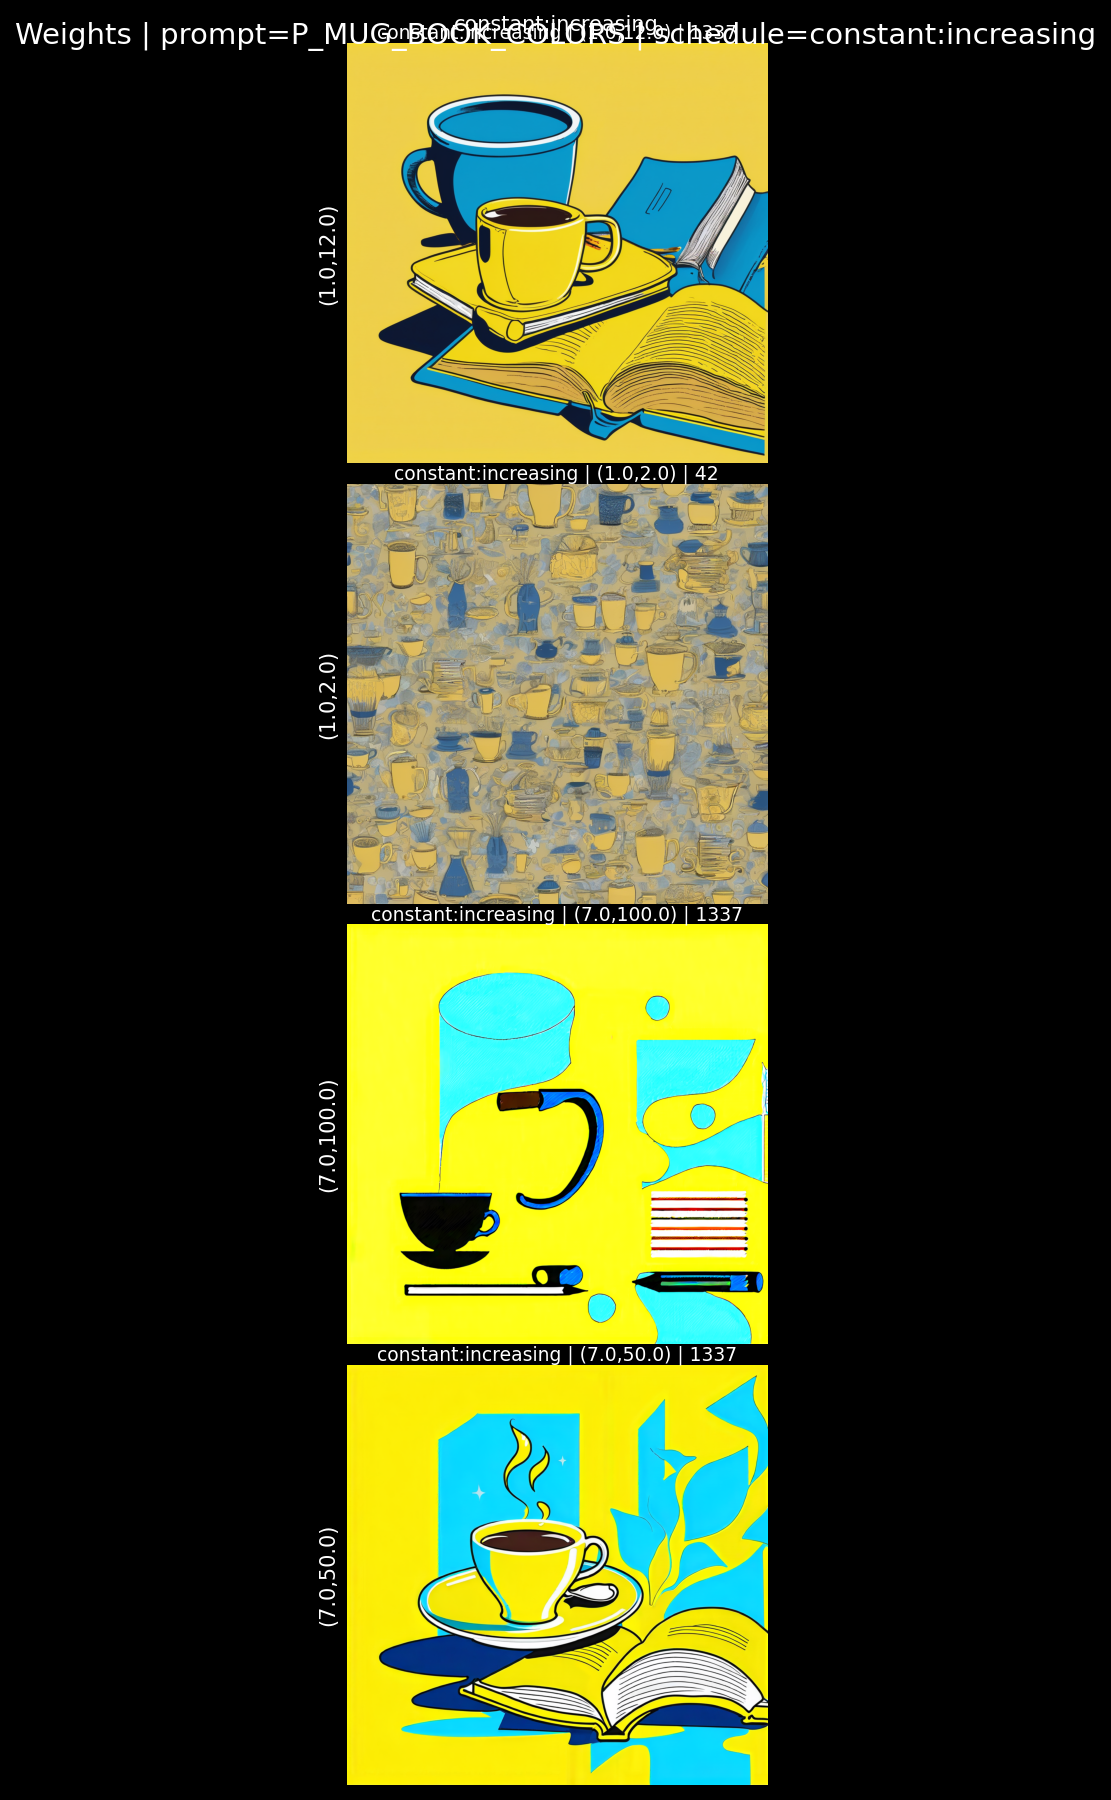

In [5]:

# 3. Use presets with overridden columns
# Compare schedules vs. runtimes dynamically
fig2 = vg.grid_weights_same_prompt_same_schedule(
    df,
    prompt_id="P_MUG_BOOK_COLORS",
    schedule="constant:increasing",
    cols="schedule",  # Override standard cols="seed"
    pick="runtime_s"  # Automatically grabs the max runtime row for the cell
)

In [ ]:
# Example 1: different schedule shapes, same prompt, same range
prompt_id = df["prompt_id"].iloc[0]
w_range = sorted(df["w_range"].unique().tolist(), key=str)[0]
fig = grid_shapes_same_prompt_same_range(df, prompt_id=prompt_id, w_range=w_range)
fig


In [ ]:
# Example 2: same schedule, same prompt, different weights
schedule = sorted(df["schedule"].unique().tolist())[0]
fig = grid_weights_same_prompt_same_schedule(df, prompt_id=prompt_id, schedule=schedule)
fig


In [ ]:
# Example 3: same schedule, different prompts, same weights
fig = grid_prompts_same_schedule_same_weights(df, schedule=schedule, w_range=w_range)
fig
